In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


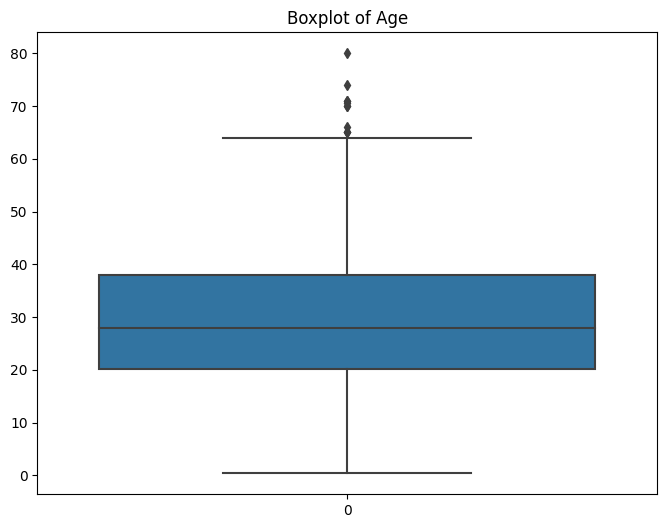

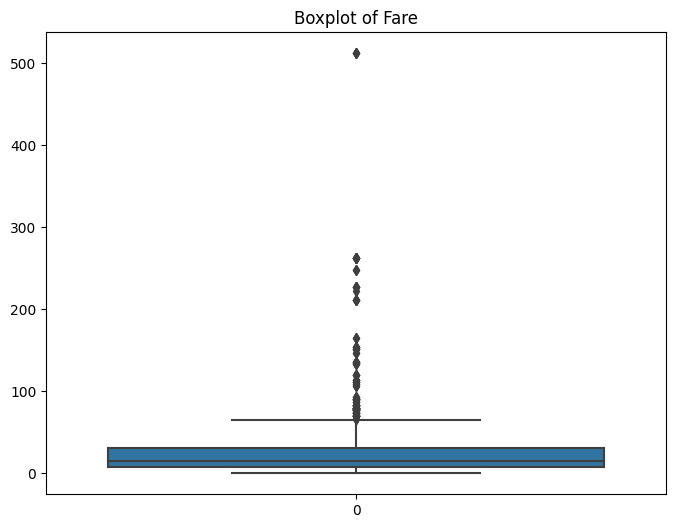

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age, Fare 피처에 대한 이상치 확인 (이 두 피처가 연속적인 수치 데이터이므로)
features = ['Age', 'Fare']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [ ]:
# 결측치 확인
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 1. Age: 중앙값으로 결측치 대체
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# 2. Embarked: 최빈값으로 결측치 대체
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
# 3. Cabin: 'Unknown'으로 결측치 대체 (Cabin 정보가 많이 누락되어 있기 때문에)
data['Cabin'].fillna('Unknown', inplace=True)
data['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [ ]:
# 처리된 데이터의 결측치 확인
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


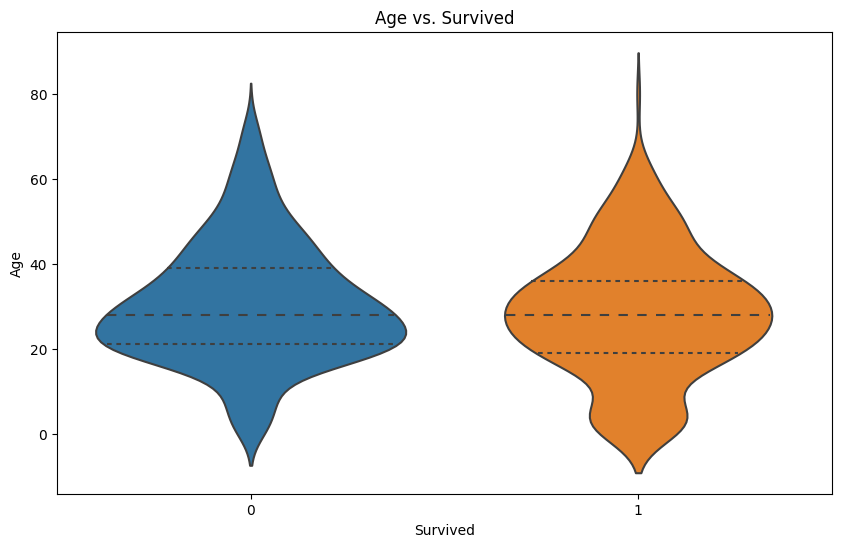

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn을 사용하여 나이에 따른 생존 여부 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 나이에 따른 생존 여부를 나타내는 바이올린 플롯 (Violin Plot) 생성
sns.violinplot(x='Survived', y='Age', data=data, inner='quartile')

# 그래프 제목과 라벨 설정
plt.title('Age vs. Survived')
plt.xlabel('Survived')
plt.ylabel('Age')

# 그래프 표시
plt.show()

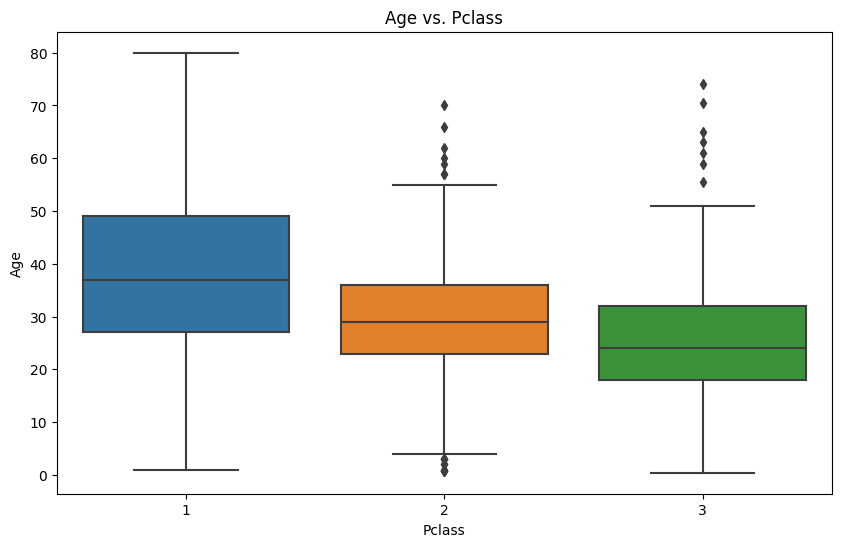

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임 또는 데이터를 불러온다 (타이타닉 데이터셋을 사용하는 예제)
# df = pd.read_csv('타이타닉 데이터 파일.csv')

# Seaborn을 사용하여 나이에 따른 티켓 클래스 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 나이에 따른 티켓 클래스를 나타내는 박스 플롯 (Box Plot) 생성
sns.boxplot(x='Pclass', y='Age', data=data)

# 그래프 제목과 라벨 설정
plt.title('Age vs. Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

# 그래프 표시
plt.show()

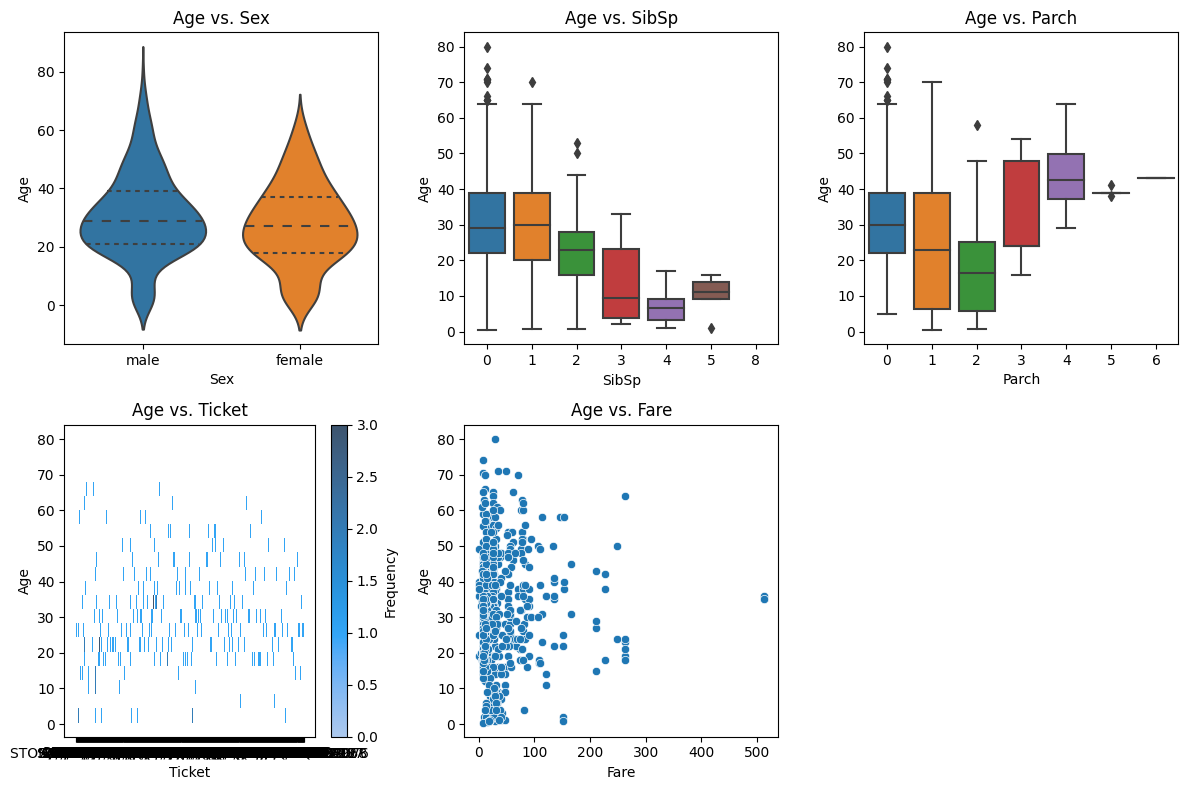

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임 또는 데이터를 불러온다 (타이타닉 데이터셋을 사용하는 예제)
# df = pd.read_csv('타이타닉 데이터 파일.csv')

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(12, 8))

# Age에 따른 성별(Sex) 분포 시각화 (바이올린 플롯)
plt.subplot(231)  # 2x3 그리드의 첫 번째 위치
sns.violinplot(x='Sex', y='Age', data=data, inner='quartile')
plt.title('Age vs. Sex')

# Age에 따른 형제자매/배우자 수(SibSp) 분포 시각화 (박스 플롯)
plt.subplot(232)  # 2x3 그리드의 두 번째 위치
sns.boxplot(x='SibSp', y='Age', data=data)
plt.title('Age vs. SibSp')

# Age에 따른 부모/자녀 수(Parch) 분포 시각화 (박스 플롯)
plt.subplot(233)  # 2x3 그리드의 세 번째 위치
sns.boxplot(x='Parch', y='Age', data=data)
plt.title('Age vs. Parch')

# Age에 따른 티켓 번호(Ticket) 분포 시각화 (히스토그램)
plt.subplot(234)  # 2x3 그리드의 네 번째 위치
sns.histplot(data=data, x='Ticket', y='Age', cbar=True, cbar_kws={'label': 'Frequency'})
plt.title('Age vs. Ticket')

# Age에 따른 요금(Fare) 분포 시각화 (산점도)
plt.subplot(235)  # 2x3 그리드의 다섯 번째 위치
sns.scatterplot(x='Fare', y='Age', data=data)
plt.title('Age vs. Fare')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## Age 결측치 해결 - 1

age 결측치의 비율이 전체의 19.8%이기 때문에, 결측치가 있는 행을 삭제하거나 age열 자체를 삭제하면 데이터가 손실되는 문제가 발생한다. 따라서 결측치를 다른 값으로 대체하는 방식을 선택했다.

age와 가장 관련 있는 열을 골라, 그 열의 값을 그룹핑한 후, 그룹별 평균 나이를 결측치 해결로 사용하고자 했다.

결측치가 있는 cabin, embarked열을 제외한 나머지 열들을 시각화한 결과, age에 따른 pcalss, sibsp, parch 값이 유의미한 차이를 보였다. 이중 pclass열의 경우, pclass 값이 높아질수록 age값이 낮아지는 경향성을 보였기 때문에, pclass별 평균 age 값을 age 결측치 해결에 사용하였다.

In [ ]:
import pandas as pd

# Pclass 별로 나이의 평균을 계산
age_by_pclass = data.groupby('Pclass')['Age'].mean().round(1)

# 결측치를 Pclass 별 평균 나이로 대체
data['Age'] = data.apply(
    lambda row: age_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# 결측치가 대체된 데이터프레임 확인
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.1
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# 처리된 데이터의 결측치 확인
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Age 결측치 해결 - 2

Age의 분포를 시각화한 결과, 최빈값이 Age열을 대표할 수 있는 값이라 생각하여 최빈값을 결측치 해결에 사용했다.

다른 데이터와의 상관 관계를 분석하지 않아도 빠르게 값을 채울 수 있다는 장점이 있다.

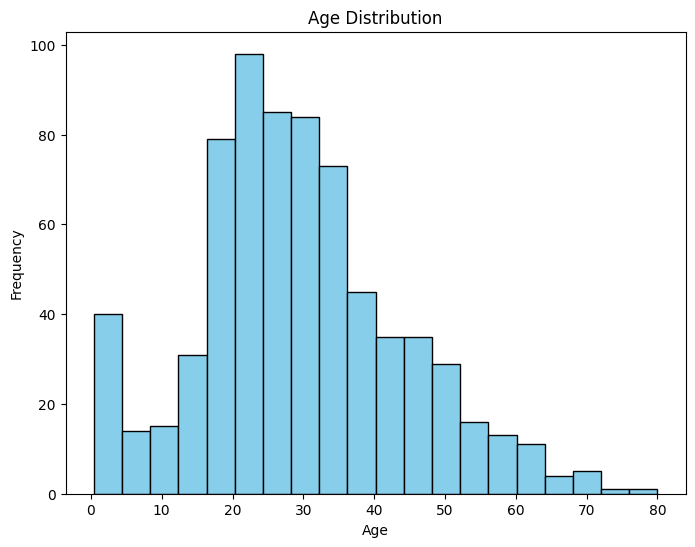

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(8, 6))

# "Age" 열의 분포를 히스토그램으로 시각화
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')  # 히스토그램 생성
plt.xlabel('Age')  # x 축 레이블 설정
plt.ylabel('Frequency')  # y 축 레이블 설정
plt.title('Age Distribution')  # 그래프 제목 설정

# 그래프 표시
plt.show()

In [ ]:
# 2. Embarked: 최빈값으로 결측치 대체
mode_age = data['Age'].mode()[0]
data['Age'].fillna(mode_age, inplace=True)
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# 처리된 데이터의 결측치 확인
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
